In [3]:

!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

Cloning into 'handson-ml-mimic-iv'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 29), reused 40 (delta 13), pack-reused 0
Receiving objects: 100% (83/83), 3.86 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [4]:

import os
print(os.getcwd())

/content


In [5]:
import os
os.chdir('/content/handson-ml-mimic-iv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import dask.dataframe as dd
import pandas as pd

In [8]:
from mimic.mimic import MIMIC, MIMICManipulations

In [9]:
mimic_instance = MIMIC('/content/drive/MyDrive/mimiv-iv')

MIMIC dataset found at path : /content/drive/MyDrive/mimiv-iv


In [10]:
mimic_manipulation_instance = MIMICManipulations('/content/drive/MyDrive/mimiv-iv')

MIMIC dataset found at path : /content/drive/MyDrive/mimiv-iv


In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!ls '/content/drive/My Drive/mimiv-iv'

admissions.parquet	 d_icd_procedures.parquet  labevents.parquet	   provider.parquet
caregiver.parquet	 d_items.parquet	   omr.parquet		   services.parquet
chartevents.parquet	 d_labitems.parquet	   outputevents.parquet    transfers.parquet
d_hcpcs.parquet		 drgcodes.parquet	   patients.parquet
diagnoses_icd.parquet	 emar.parquet		   poe_detail.parquet
d_icd_diagnoses.parquet  icustays.parquet	   procedures_icd.parquet


In [13]:
df = pd.read_csv('/content/drive/MyDrive/ch_03_dataset.csv')

In [14]:
df.head()

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,F,19,2160,2008 - 2010,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            431231 non-null  int64 
 1   subject_id            431231 non-null  int64 
 2   hadm_id               431231 non-null  int64 
 3   admittime             431231 non-null  object
 4   dischtime             431231 non-null  object
 5   deathtime             8598 non-null    object
 6   admission_type        431231 non-null  object
 7   admit_provider_id     431227 non-null  object
 8   admission_location    431231 non-null  object
 9   discharge_location    312076 non-null  object
 10  insurance             431231 non-null  object
 11  language              431231 non-null  object
 12  marital_status        421998 non-null  object
 13  race                  431231 non-null  object
 14  edregtime             299282 non-null  object
 15  edouttime        

In [16]:
df.describe()

,Unnamed: 0,subject_id,hadm_id,hospital_expire_flag,anchor_age,anchor_year
count,431231.000000,4.312310e+05,4.312310e+05,431231.000000,431231.000000,431231.000000
mean,215615.000000,1.500766e+07,2.500314e+07,0.019964,56.875394,2152.764136
std,124485.811304,2.877498e+06,2.888180e+06,0.139876,19.051639,23.666988
min,0.000000,1.000003e+07,2.000002e+07,0.000000,18.000000,2110.000000
25%,107807.500000,1.251557e+07,2.250155e+07,0.000000,43.000000,2133.000000
50%,215615.000000,1.501288e+07,2.500669e+07,0.000000,58.000000,2153.000000
75%,323422.500000,1.749622e+07,2.750470e+07,0.000000,72.000000,2173.000000
max,431230.000000,1.999999e+07,2.999993e+07,1.000000,91.000000,2208.000000


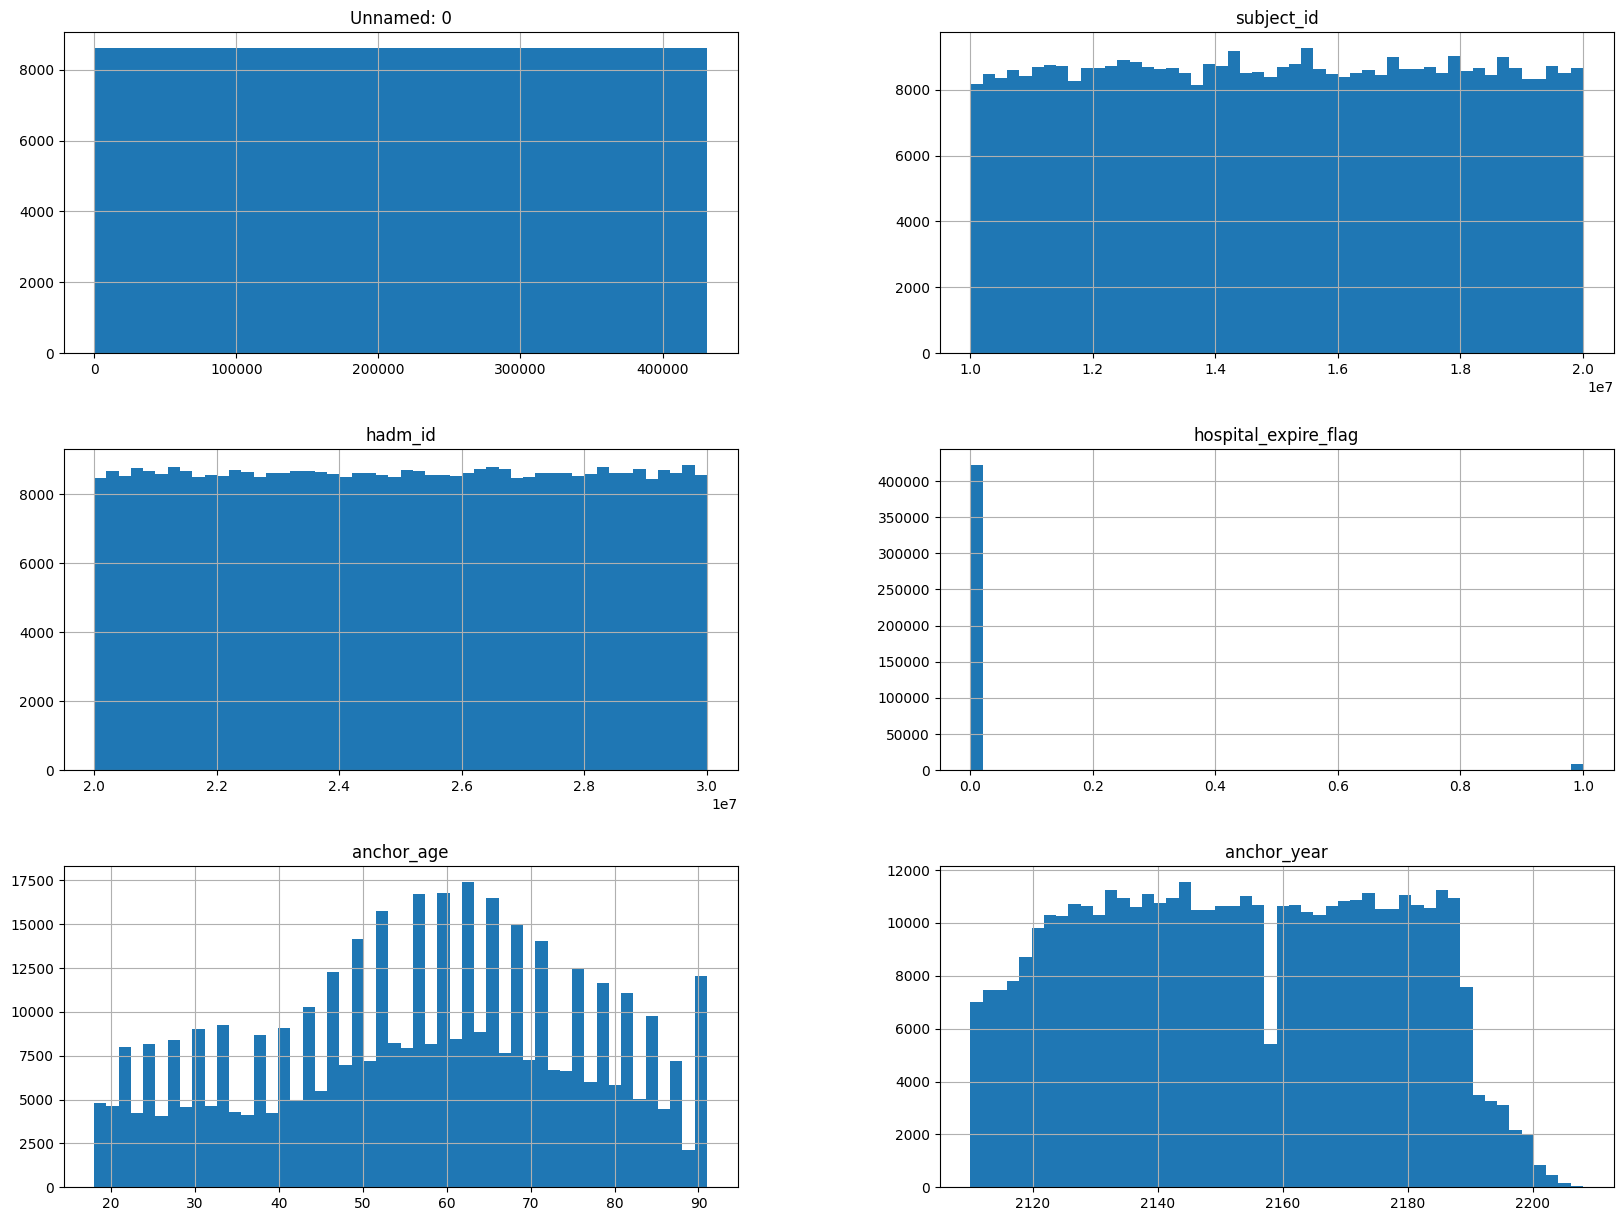

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
df = df[['marital_status', 'hospital_expire_flag']]

In [20]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421998 entries, 0 to 431229
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   marital_status        421998 non-null  int8 
 1   hospital_expire_flag  421998 non-null  int64
dtypes: int64(1), int8(1)
memory usage: 6.8 MB


In [22]:
df['marital_status'] = df['marital_status'].astype('category').cat.codes

In [42]:
df.describe()

,marital_status,hospital_expire_flag
count,421998.000000,421998.000000
mean,1.528931,0.017758
std,0.785129,0.132072
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,3.000000,1.000000


In [23]:
# Splitting data into train and test sets
X = df[['marital_status']]
y = df['hospital_expire_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Importing necessary modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Pipeline construction
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([ # Now ColumnTransformer should be recognized
    ('num', num_pipeline, X.columns)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)


Model Training and Evaluation:

Logistic Regression:


In [25]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_prepared, y_train)

LogisticRegression(random_state=42)

In [26]:
# Predictions and Evaluation
y_pred = clf.predict(X_test_prepared)


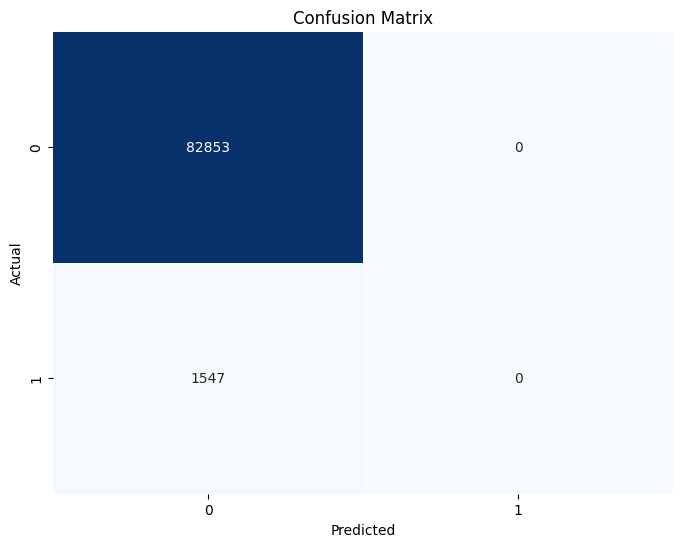

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9816706161137441

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     82853
           1       0.00      0.00      0.00      1547

    accuracy                           0.98     84400
   macro avg       0.49      0.50      0.50     84400
weighted avg       0.96      0.98      0.97     84400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


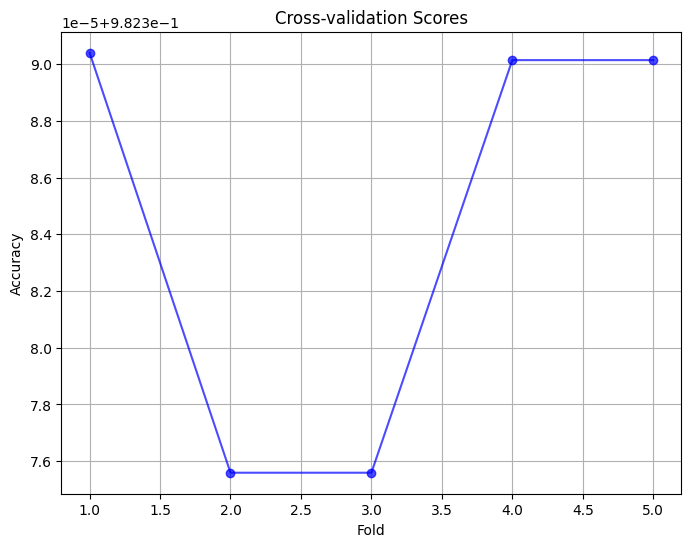

In [32]:
# Optional: Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_prepared, y_train, cv=5) # Perform cross-validation

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), scores, marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Training the classifier (Logistic Regression in this case)
clf = LogisticRegression(random_state=42)
clf.fit(X_train_prepared, y_train)

# Predicting probabilities and calculating Precision/Recall metrics
y_scores = clf.decision_function(X_test_prepared)
precisions, recalls, _ = precision_recall_curve(y_test, y_scores)

## Plotting Precision/Recall trade-off curve

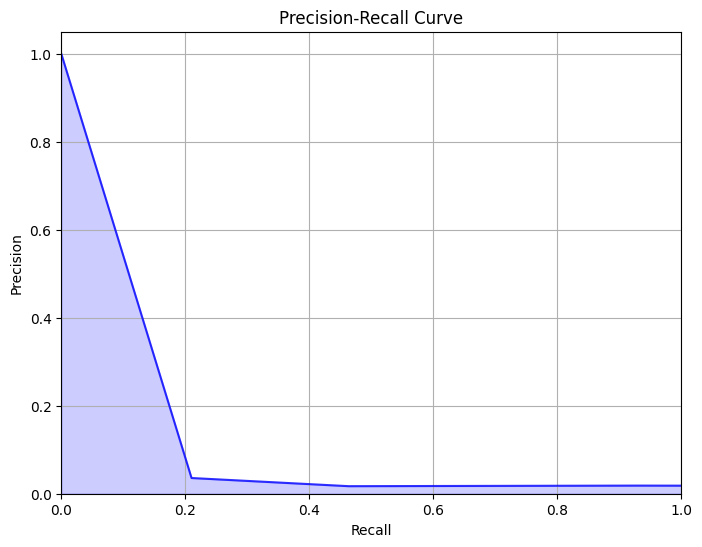

In [36]:
# Plotting Precision/Recall trade-off curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='b', alpha=0.8)
plt.fill_between(recalls, precisions, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

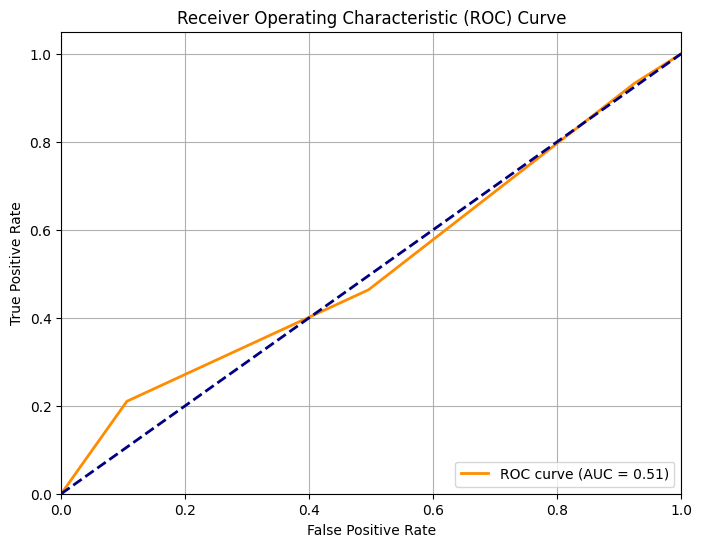

In [37]:
# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

# Making predictions and evaluating the model's performance.

In [39]:
y_pred_sgd = sgd_clf.predict(X_test_prepared)


Evaluation:

Confusion Matrix: Plotting the confusion matrix for the SGD classifier.

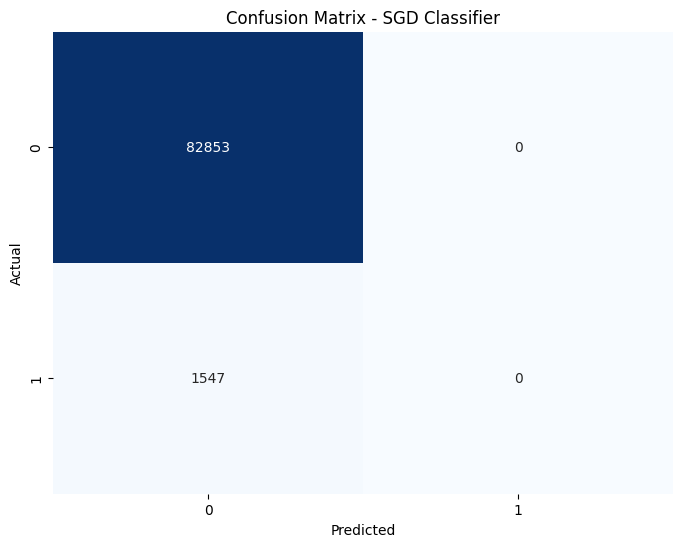

In [40]:
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


MultiClass classification

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Assuming 'discharge_location' is our multi-class target variable
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/ch_03_dataset.csv')

In [59]:
# Displaying the first few rows of the dataset
df.head()

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,F,52,2180,2014 - 2016,2180-09-09
1,1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,F,52,2180,2014 - 2016,2180-09-09
2,2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,F,52,2180,2014 - 2016,2180-09-09
3,3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,F,52,2180,2014 - 2016,2180-09-09
4,4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,F,19,2160,2008 - 2010,NaN


In [60]:
# Selecting relevant columns
df = df[['marital_status', 'discharge_location']]

In [61]:
# Dropping rows with missing values
df.dropna(inplace=True)


In [62]:
# Converting categorical variables to numerical codes
df['marital_status'] = df['marital_status'].astype('category').cat.codes
df['discharge_location'] = df['discharge_location'].astype('category').cat.codes

In [63]:
# Splitting data into train and test sets
X = df[['marital_status']]
y = df['discharge_location']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Pipeline construction for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, X.columns)
])

In [66]:
# Transforming data
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [67]:
# OneVsRest Logistic Regression
ovr_clf = OneVsRestClassifier(LogisticRegression(random_state=42))
ovr_clf.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [68]:
# Predictions and Evaluation
y_pred_ovr = ovr_clf.predict(X_test_prepared)

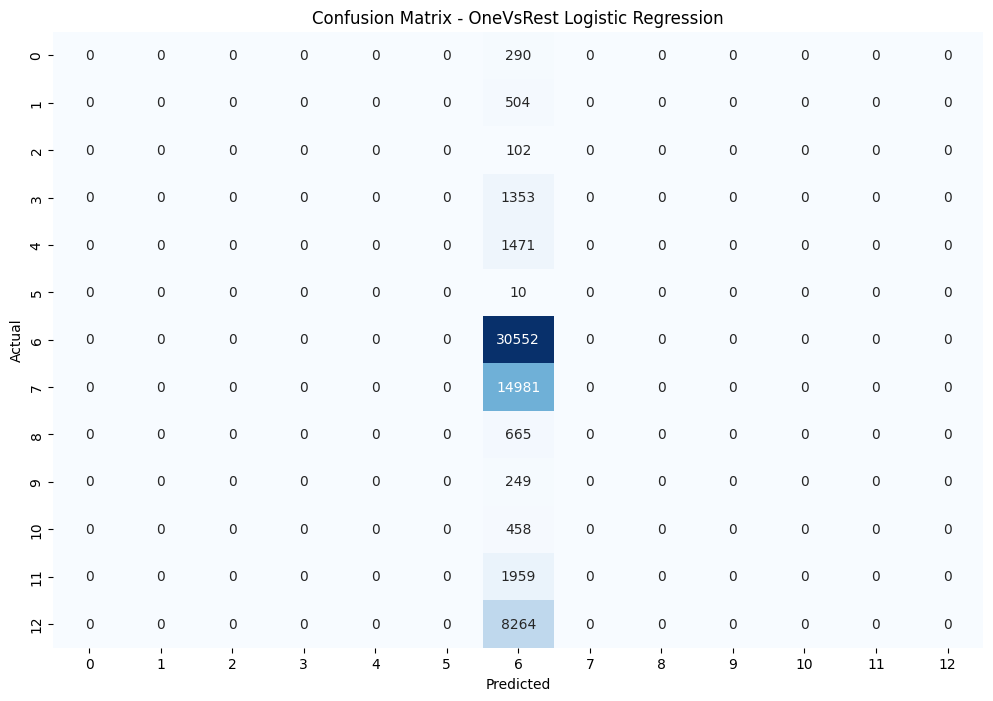

In [69]:
# Confusion Matrix
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_ovr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - OneVsRest Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
# Evaluating the model
print("Accuracy (OneVsRest Logistic Regression):", accuracy_score(y_test, y_pred_ovr))
print("\nClassification Report (OneVsRest Logistic Regression):\n", classification_report(y_test, y_pred_ovr))

Accuracy (OneVsRest Logistic Regression): 0.5020210982943902

Classification Report (OneVsRest Logistic Regression):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.00      0.00      0.00       504
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00      1353
           4       0.00      0.00      0.00      1471
           5       0.00      0.00      0.00        10
           6       0.50      1.00      0.67     30552
           7       0.00      0.00      0.00     14981
           8       0.00      0.00      0.00       665
           9       0.00      0.00      0.00       249
          10       0.00      0.00      0.00       458
          11       0.00      0.00      0.00      1959
          12       0.00      0.00      0.00      8264

    accuracy                           0.50     60858
   macro avg       0.04      0.08      0.05     60858
weighted avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
